In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import csv

# Cargar los datos del archivo CSV
questions_and_answers_df = pd.read_csv('questions_and_answers_V2.csv')
interactions_df = pd.read_csv('interactions.csv')

In [2]:
# Preprocesamiento y Entrenamiento de Modelos
# Dividir los datos en conjunto de entrenamiento y prueba
X = questions_and_answers_df['question']
y = questions_and_answers_df['answer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorizar las preguntas
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [3]:
# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)

# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train_vectorized, y_train)

SVC()

In [4]:
# Evaluar modelos
nb_predictions = nb_model.predict(X_test_vectorized)
svm_predictions = svm_model.predict(X_test_vectorized)

nb_classification_report = classification_report(y_test, nb_predictions, zero_division=0)
svm_classification_report = classification_report(y_test, svm_predictions, zero_division=0)

In [5]:
print("Naive Bayes Classification Report:")
print(nb_classification_report)

Naive Bayes Classification Report:
                                                                                                                  precision    recall  f1-score   support

                                                           Celebro mis logros registrando mis mejoras y avances.       0.00      0.00      0.00       0.0
                          Claro, ¿por qué los robots no van a las fiestas? Porque tienen miedo de perder aceite.       0.00      0.00      0.00       0.0
                         Como robot, no tengo preferencias, pero los humanos me han dicho que el azul es bonito.       0.00      0.00      0.00       0.0
                                            Defino el éxito como la capacidad de mejorar y ayudar continuamente.       0.00      0.00      0.00       0.0
                                                Hola, estoy bien, gracias por preguntar. ¿En qué puedo ayudarte?       0.00      0.00      0.00       1.0
                                        

In [6]:
print("SVM Classification Report:")
print(svm_classification_report)

SVM Classification Report:
                                                                                                                  precision    recall  f1-score   support

                                                           Celebro mis logros registrando mis mejoras y avances.       0.00      0.00      0.00       0.0
                                                Hola, estoy bien, gracias por preguntar. ¿En qué puedo ayudarte?       0.00      0.00      0.00       1.0
                                                La creatividad es una habilidad humana impresionante que admiro.       0.00      0.00      0.00       1.0
                                                     La tecnología es fascinante y tiene un potencial ilimitado.       0.00      0.00      0.00       0.0
                                              Lo que me hace especial es mi capacidad para aprender y adaptarme.       0.00      0.00      0.00       0.0
                                     Los videoju

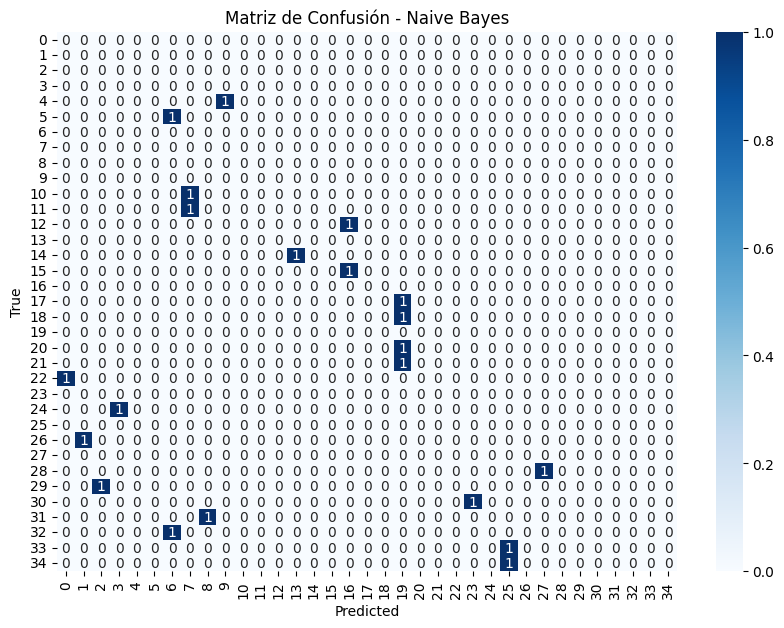

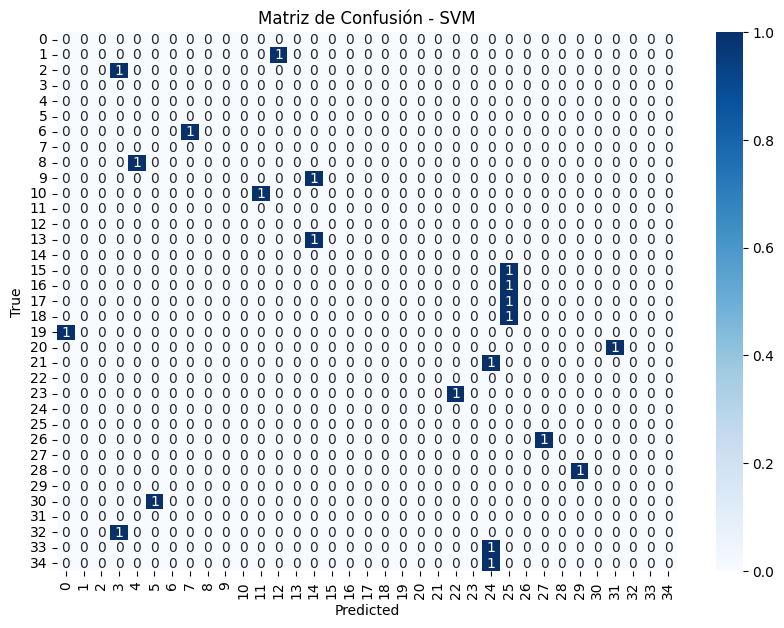

In [7]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(y_test, nb_predictions, 'Matriz de Confusión - Naive Bayes')
plot_confusion_matrix(y_test, svm_predictions, 'Matriz de Confusión - SVM')

In [8]:
def compare_responses_to_csv(interactions_df, nb_model, svm_model, vectorizer, output_file):
    comparisons = []
    for index, row in interactions_df.iterrows():
        user_question = row['User']
        true_response = row['Bot']
        user_question_vectorized = vectorizer.transform([user_question])
        nb_response = nb_model.predict(user_question_vectorized)[0]
        svm_response = svm_model.predict(user_question_vectorized)[0]
        comparisons.append({
            'Interaction': index + 1,
            'User': user_question,
            'True Response': true_response,
            'Naive Bayes Response': nb_response,
            'SVM Response': svm_response
        })
    
    keys = comparisons[0].keys()
    with open(output_file, 'w', newline='', encoding='utf-8') as output_csv:
        dict_writer = csv.DictWriter(output_csv, fieldnames=keys)
        dict_writer.writeheader()
        dict_writer.writerows(comparisons)

# Generar y guardar las respuestas comparativas
output_file = 'comparative_responses.csv'
compare_responses_to_csv(interactions_df, nb_model, svm_model, vectorizer, output_file)

In [9]:
# Cargar los datos del archivo CSV comparativo
comparative_responses_df = pd.read_csv('comparative_responses.csv')

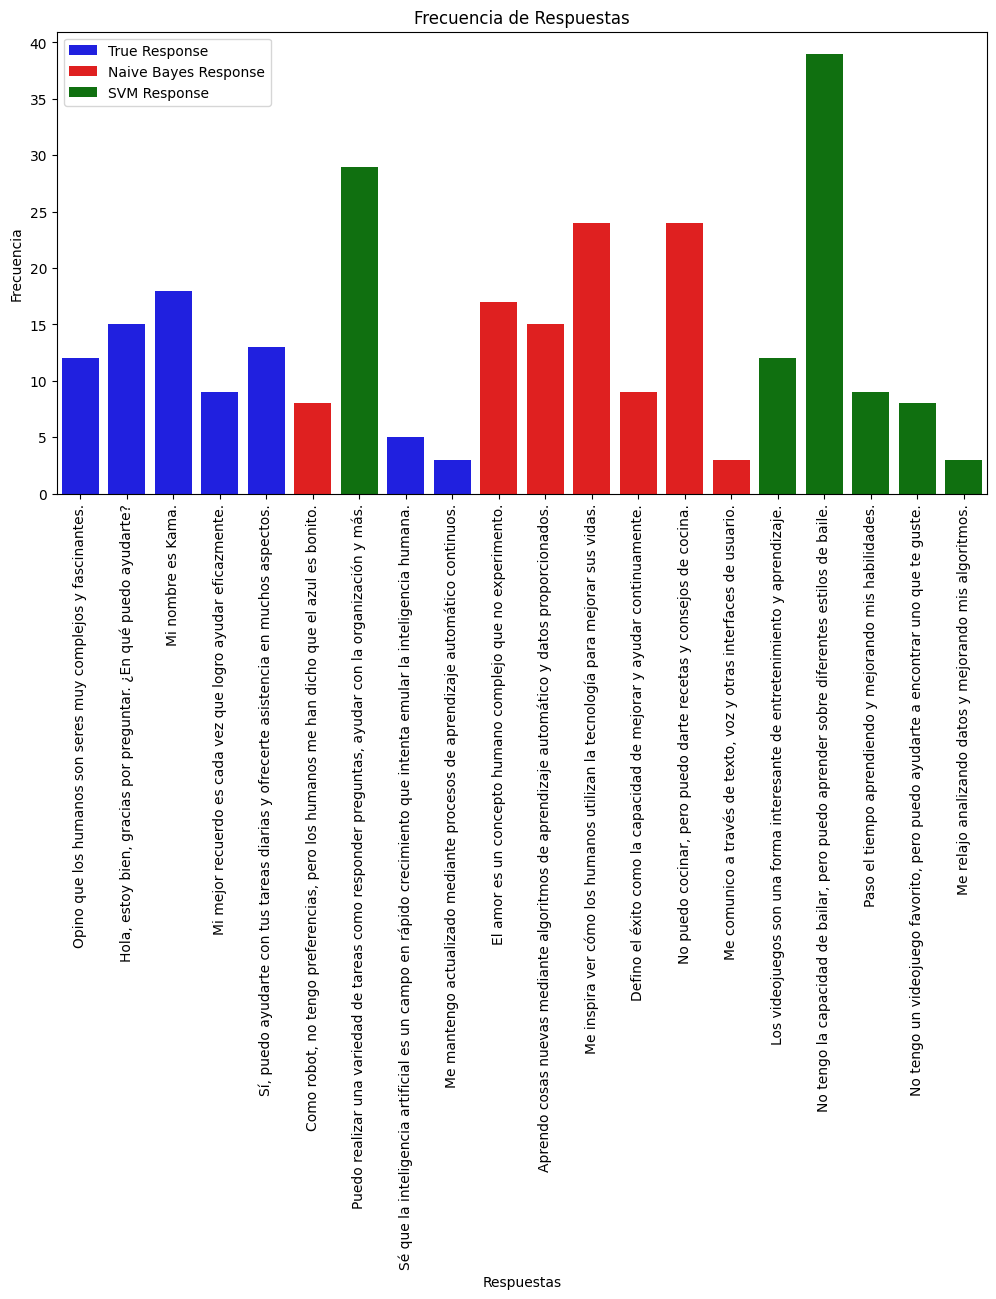

In [10]:
# Gráfica de barras para comparar la frecuencia de las respuestas de los modelos con las respuestas verdaderas
def plot_response_frequencies(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='True Response', data=df, color='blue', label='True Response')
    sns.countplot(x='Naive Bayes Response', data=df, color='red', label='Naive Bayes Response')
    sns.countplot(x='SVM Response', data=df, color='green', label='SVM Response')
    plt.title('Frecuencia de Respuestas')
    plt.xlabel('Respuestas')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.xticks(rotation=90)
    plt.show()

plot_response_frequencies(comparative_responses_df)

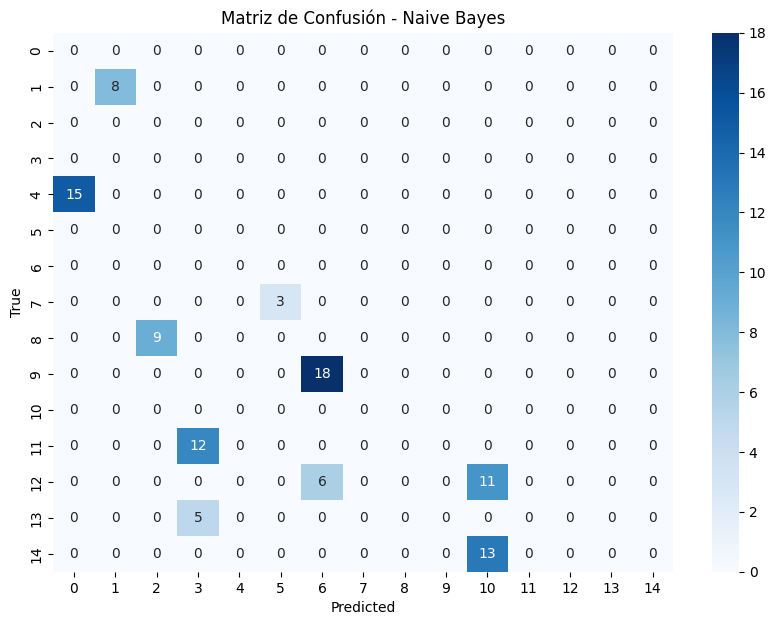

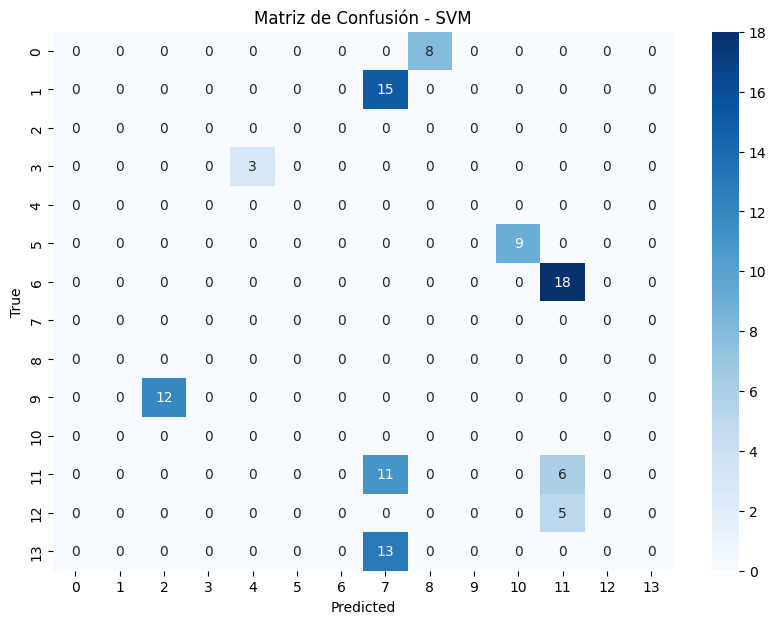

In [11]:
# Matriz de confusión para visualizar las predicciones correctas e incorrectas de Naive Bayes
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(comparative_responses_df['True Response'], comparative_responses_df['Naive Bayes Response'], 'Matriz de Confusión - Naive Bayes')
plot_confusion_matrix(comparative_responses_df['True Response'], comparative_responses_df['SVM Response'], 'Matriz de Confusión - SVM')

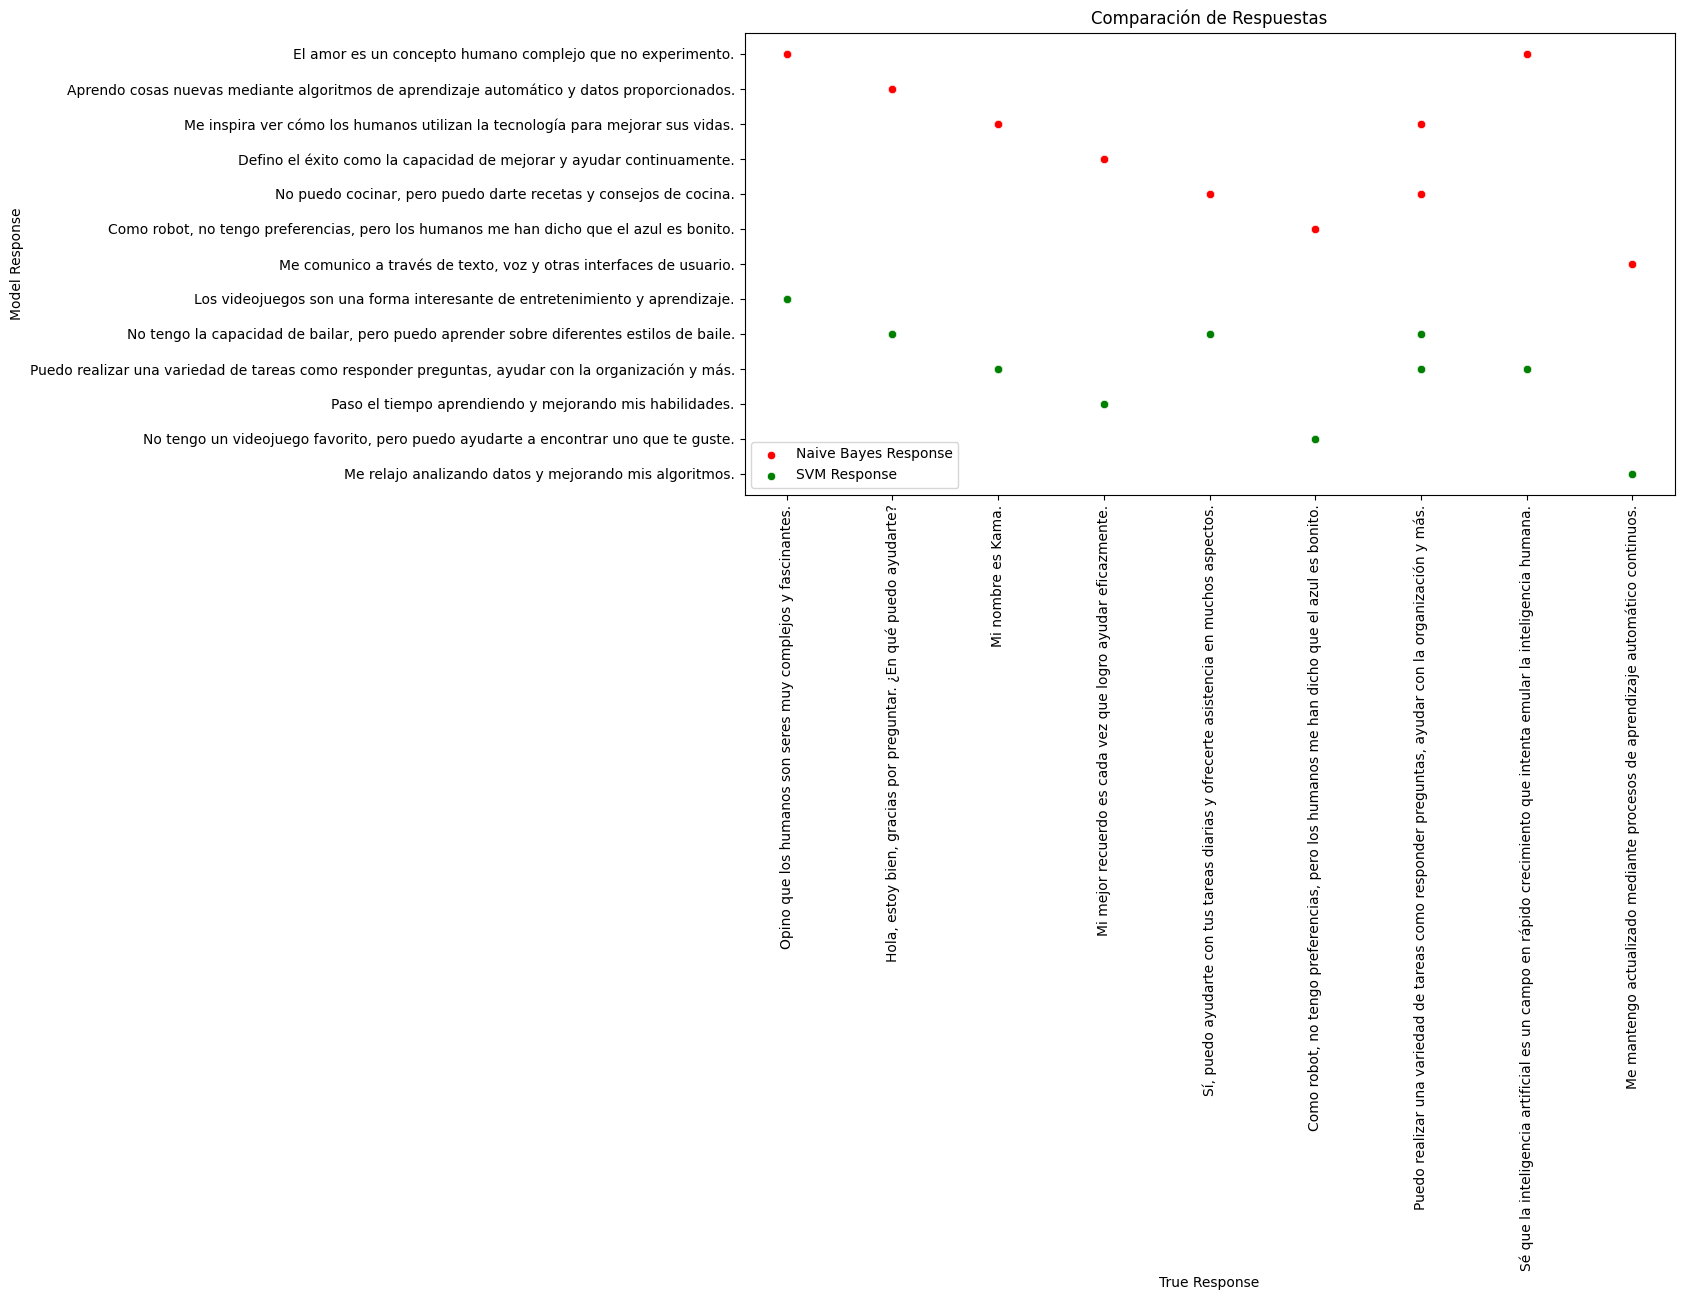

In [12]:
# Gráfica de dispersión para comparar las respuestas de los modelos y las respuestas verdaderas
def plot_scatter_responses(df):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='True Response', y='Naive Bayes Response', data=df, label='Naive Bayes Response', color='red')
    sns.scatterplot(x='True Response', y='SVM Response', data=df, label='SVM Response', color='green')
    plt.title('Comparación de Respuestas')
    plt.xlabel('True Response')
    plt.ylabel('Model Response')
    plt.legend()
    plt.xticks(rotation=90)
    plt.show()

plot_scatter_responses(comparative_responses_df)

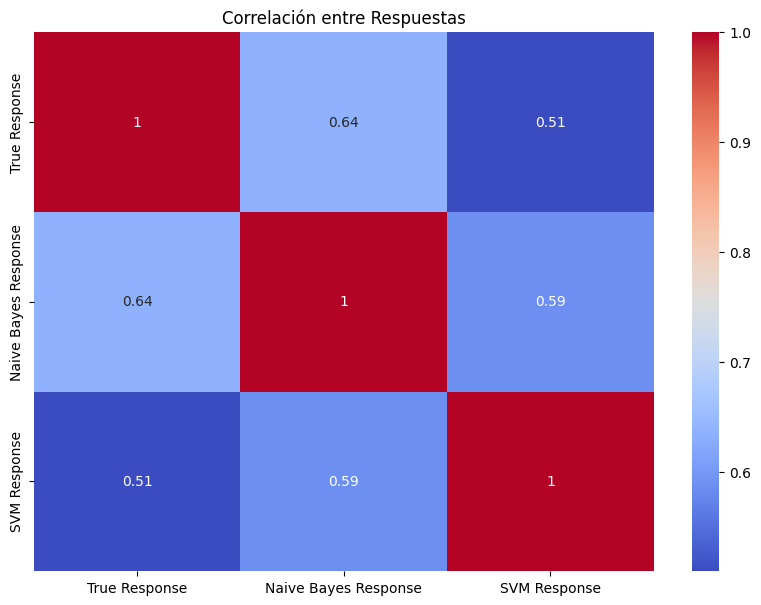

In [13]:
# Gráfica de calor para visualizar la correlación entre las respuestas de los modelos y las respuestas verdaderas
def plot_heatmap_responses(df):
    correlation_matrix = df[['True Response', 'Naive Bayes Response', 'SVM Response']].apply(lambda x: pd.factorize(x)[0]).corr()
    plt.figure(figsize=(10, 7))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlación entre Respuestas')
    plt.show()

plot_heatmap_responses(comparative_responses_df)